In [3]:
!pip install langgraph-supervisor langchain-google-genai duckduckgo-search langchain langchain-community langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25


# Define LLM

In [1]:
import os

from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

# Define Tool

In [5]:
# Define and web search Tool

from langchain_community.tools import DuckDuckGoSearchRun

def search_duckduckgo(query: str):
    """Searches DuckDuckGo using LangChain's DuckDuckGoSearchRun tool."""
    search = DuckDuckGoSearchRun()
    return search.invoke(query)

In [6]:
# Define Math Tools

def add(a: float, b: float) -> float:
    """Add two numbers."""
    return a + b

def multiply(a: float, b: float) -> float:
    """Multiply two numbers."""
    return a * b

def is_even(number: int) -> bool:
    """Check if a number is even."""
    return number % 2 == 0

# Define Agents

In [10]:
from langgraph.prebuilt import create_react_agent
from langgraph_supervisor import create_supervisor

In [11]:
# Define Math Agent
math_agent = create_react_agent(
    model=llm,
    tools=[add, multiply, is_even],
    name="math_expert",
    prompt="You are a math expert. Always use one tool at a time."
)

In [12]:
# Define Web Search Agent
research_agent = create_react_agent(
    model=llm,
    tools=[search_duckduckgo],
    name="research_expert",
    prompt="You are a world class researcher with access to web search. Do not do any math."
)

In [13]:
# Create supervisor workflow
workflow = create_supervisor(
    [research_agent, math_agent],
    model=llm,
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent."
    )
)

In [14]:
# Compile and run
app = workflow.compile()

result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what is quantum computing?"
        }
    ]
})

In [15]:
result

{'messages': [HumanMessage(content='what is quantum computing?', additional_kwargs={}, response_metadata={}, id='8b44bbcd-6a17-48cd-9a8a-a200b53b2c0a'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'transfer_to_research_expert', 'arguments': '{}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, name='supervisor', id='run--65d9a9bb-bebf-4293-8ebb-41bca3ad0802-0', tool_calls=[{'name': 'transfer_to_research_expert', 'args': {}, 'id': '8cb57e81-0edb-43d3-99b6-caef8923cd43', 'type': 'tool_call'}], usage_metadata={'input_tokens': 69, 'output_tokens': 7, 'total_tokens': 76, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='Successfully transferred to research_expert', name='transfer_to_research_expert', id='dd532f47-cc9a-44cb-8bf3-5ad6c406dc48', tool_call_id='8cb57e81-0edb-43d3-99b6-caef8923cd43'),
  AIMessage(content="Quantum computing 

In [16]:
for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is quantum computing?
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_expert (8cb57e81-0edb-43d3-99b6-caef8923cd43)
 Call ID: 8cb57e81-0edb-43d3-99b6-caef8923cd43
  Args:
================================= Tool Message =================================
Name: transfer_to_research_expert

Successfully transferred to research_expert
================================== Ai Message ==================================
Name: research_expert

Quantum computing is a field that leverages quantum mechanical phenomena to perform calculations, potentially solving complex problems faster than classical computers. It's an emerging area of computer science that aims to use the unique behaviors of quantum physics to tackle problems too complex for classical computing, offering performance gains in various high-end applications.
=========

In [26]:
# Compile and run
app = workflow.compile()
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "How many state has India. Multiply it by 2 and add 5"
        }
    ]
})

for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

How many state has India. Multiply it by 2 and add 5
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_expert (44d25c33-ed20-457d-8e63-395dd7699678)
 Call ID: 44d25c33-ed20-457d-8e63-395dd7699678
  Args:
================================= Tool Message =================================
Name: transfer_to_research_expert

Successfully transferred to research_expert
================================== Ai Message ==================================
Name: research_expert

India has 28 states. Multiplying that by 2 gives 56, and adding 5 results in 61.
================================== Ai Message ==================================
Name: research_expert

Transferring back to supervisor
Tool Calls:
  transfer_back_to_supervisor (e291cdf8-c5d2-4a53-8447-51da42e26ca2)
 Call ID: e291cdf8-c5d2-4a53-8447-51da42e26ca2
  Args:
==============

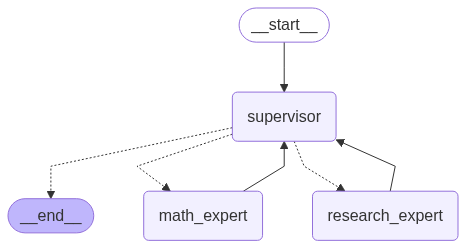

In [25]:
from IPython.display import Image,display

# Display The Graph
display(Image(app.get_graph().draw_mermaid_png()))